<a href="https://colab.research.google.com/github/tuankiet110301/CS114.L22.KHCL/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lấy tập dữ liệu

In [ ]:
Data = ['Size', 'Time']
Data_train = pd.read_csv("https://cs.uit.edu.vn/data2.txt",names=Data)
Data_test = pd.read_csv("https://cs.uit.edu.vn/data3.txt",names=Data)

In [ ]:
# Dữ liệu train
X_train = np.array(Data_train['Size']).reshape(-1,1)
y_train = np.array(Data_train['Time']).reshape(-1,1)

# Dữ liệu test
X_test = np.array(Data_test['Size']).reshape(-1, 1)
y_test = np.array(Data_test['Time']).reshape(-1,1)


Train bằng mô hình LinearRegression trong thư viện sklearn


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Tính Mean Square Error

In [ ]:
from sklearn.metrics import mean_squared_error
Data_pre = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, Data_pre)
lin_mse

0.020664949397549082

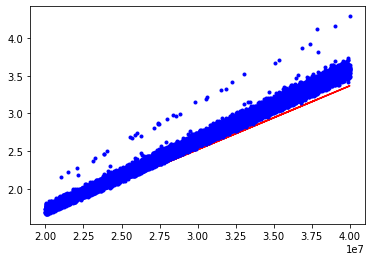

In [ ]:
plt.plot(X_test, Data_pre, "r-")
plt.plot(X_test, y_test, "b.")
plt.show()

Tính trung bình của y_test

In [ ]:
print(np.average(y_test))

2.642811968838527


Nhận Xét:

Mean Square Error: 0.020664949397549082
=> Độ Error = np.sqrt(MSE)/ np.average(y_test) = 0.054

Theo vấn đề đặt ra của bài toán thì kết quả này chưa tốt vì khi đặt vào dữ liệu lớn độ Error sẽ tăng lên do đó là cần phương án để cải thiện MSE

Phương án: tăng số chiều của dữ liệu đầu vào

y = a*x + b* x^2 + c * lg(x) + d *x *lg(x) + e


In [ ]:
X_train_2 = np.zeros((np.size(X_train),5))

Thay đổi số chiều của tập train và tập test

In [ ]:
X_train_2[:,:1] = X_train
X_train_2[:,1:2] = X_train**2
X_train_2[:,2:3] = np.log(X_train)
X_train_2[:,3:4] = X_train*np.log(X_train)

In [ ]:
X_test_2 = np.zeros((np.size(X_test),5))
X_test_2[:,:1] = X_test
X_test_2[:,1:2] = X_test**2
X_test_2[:,2:3] = np.log(X_test)
X_test_2[:,3:4] = X_test*np.log(X_test)

In [ ]:
lin_reg.fit(X_train_2, y_train)

Data_pre = lin_reg.predict(X_test_2)
lin_mse = mean_squared_error(y_test, Data_pre)
lin_mse

0.004181195754199487

Nhận xét:

MSE đã nhỏ hơn => mô hình đã tốt hơn

Kết luận:
Trong bài toán LinearRegression ta có thể cải thiện mô hình bằng cách công thêm biểu thức vào phương trình gốc để tăng số chiều của tập train
